# Name = Anuj Kumar

# Task-1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
url = "http://bit.ly/w-data"
data=pd.read_csv(url)
print("Data import succesfully:")
data.head()

Data import succesfully:


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Reading Data

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Find outliers

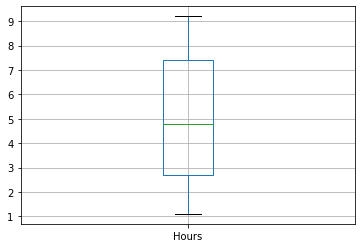

In [7]:
data.boxplot('Hours')

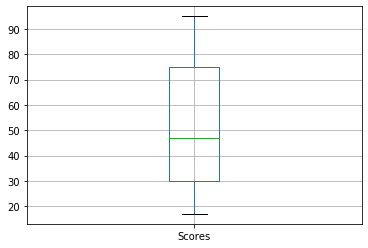

In [8]:
data.boxplot('Scores')

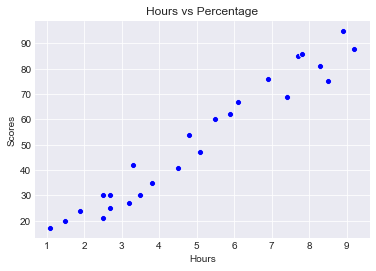

In [9]:
plt.style.use('seaborn-darkgrid')
plt.title('Hours vs Percentage')
sns.scatterplot(x=data.Hours, y=data.Scores, color="Blue")

# Check Linearity

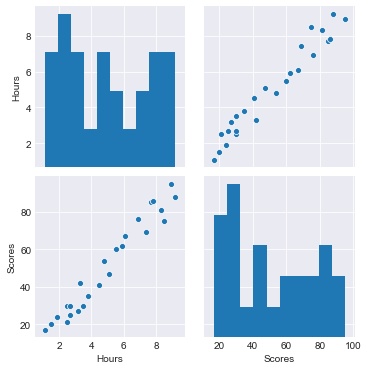

In [10]:
sns.pairplot(data)

# Check Normality

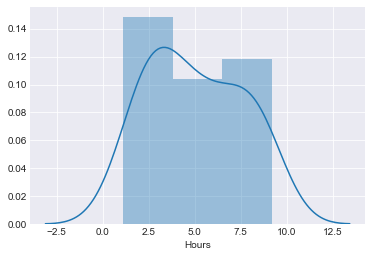

In [11]:
sns.distplot(data['Hours'])

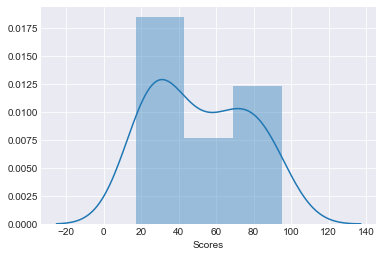

In [12]:
sns.distplot(data['Scores'])

In [13]:
data.skew()

Hours     0.190338
Scores    0.233965
dtype: float64

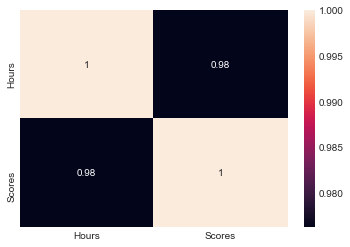

In [14]:
sns.heatmap(data.corr(),annot=True)

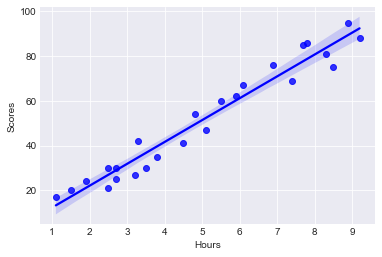

In [15]:
sns.regplot(x=data.Hours, y=data.Scores, color="Blue",fit_reg=True)

# Preparing Data

In [16]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [18]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# Fit the model

In [19]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()  
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred=lr.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [21]:
df=pd.DataFrame({'Actual':y_test,'predict':y_pred})

In [22]:
df

,Actual,predict
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Predict of hour=9.25

In [23]:
# You can also test with your own data
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_pred,y_test)
r2=r2_score(y_test,y_pred)
print('R-Squared = {}'.format(r2))
print('Mean absolute error = {}'.format(mae))

R-Squared = 0.9454906892105356
Mean absolute error = 4.183859899002975
